#Ph√¢n t√≠ch d·ªØ li·ªáu ƒë√£ l√†m s·∫°ch


In [249]:
%pip install seaborn wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Data/Data_Final.csv')
df.info()

Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             248 non-null    object
 1   id_post          248 non-null    object
 2   created_time     248 non-null    object
 3   message          248 non-null    object
 4   type             248 non-null    object
 5   picture          248 non-null    object
 6   like             248 non-null    int64 
 7   love             248 non-null    int64 
 8   haha             248 non-null    int64 
 9   wow              248 non-null    int64 
 10  sad              248 non-null    int64 
 11  angry            248 non-null    int64 
 12  comments         248 non-null    object
 13  total_reactions  248 non-null    int64 
 14  total_shares     248 non-null    int64 
 15  total_comments   248 non-null    int64 
dtypes: int64(9), o

In [60]:
df.describe()

like         love         haha         wow          sad  \
count    248.000000   248.000000   248.000000  248.000000   248.000000   
mean    2289.104839    28.241935  1802.483871    9.056452   124.741935   
std     1718.978782   139.722534  1688.099919   42.086339   264.442485   
min      252.000000     0.000000    49.000000    0.000000     0.000000   
25%     1208.500000     4.000000   647.500000    1.000000    14.000000   
50%     1864.000000     7.000000  1159.000000    2.000000    40.000000   
75%     2832.000000    12.250000  2292.250000    5.000000   125.750000   
max    12215.000000  1937.000000  9642.000000  403.000000  2501.000000   

            angry  total_reactions  total_shares  total_comments  
count  248.000000       248.000000    248.000000      248.000000  
mean     0.423387      4254.052419     96.201613      311.806452  
std      1.311031      3216.384195    232.470641      413.880700  
min      0.000000       448.000000      0.000000       10.000000  
25%      0.000000      2198.750000     17.000000       73.500000  
50%      0.000000      3254.000000     40.500000      168.000000  
75%      0.000000      5176.500000     89.250000      367.250000  
max     16.000000     20379.000000   3095.000000     2902.000000

In [172]:
#B√†i vi·∫øt c√≥ s·ªë l∆∞·ª£t t∆∞∆°ng t√°c l·ªõn nh·∫•t
df['tuong_tac'] = df['total_comments'] + df['total_reactions'] + df['total_shares']
df_sorted = df.sort_values(by='tuong_tac', ascending=False)
most_interacted_post = df_sorted.iloc[0]
most_interacted_post

name                                              Bi·∫øt th·∫ø √©o ƒëi l√†m
id_post                              101084031778928_858034806328828
created_time                                2023-08-29T01:50:26+0000
message            C√≥ m·ªôt v·∫°n h√†nh tinh nh∆∞ng t√¥i l·∫°i sinh ra ·ªü h...
type                                                           photo
picture            https://scontent.fhan3-3.fna.fbcdn.net/v/t39.3...
like                                                            8185
love                                                              35
haha                                                            9642
wow                                                               14
sad                                                             2501
angry                                                              2
comments           [{'created_time': '2023-08-29T01:51:05+0000', ...
total_reactions                                                20379
total_shares   

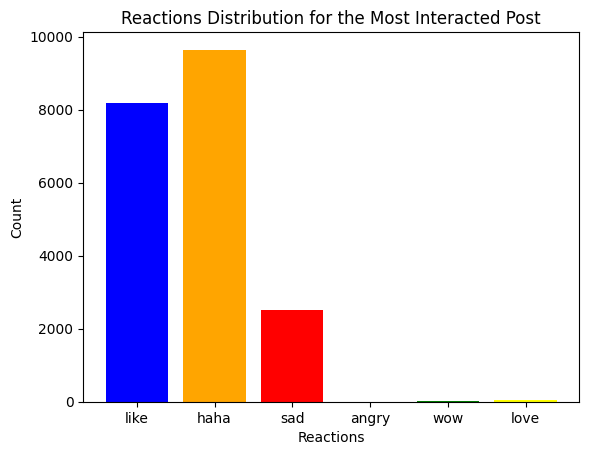

In [62]:
reactions = ['like', 'haha', 'sad','angry','wow', 'love']
counts = [most_interacted_post[reaction] for reaction in reactions]

# Plotting
plt.bar(reactions, counts, color=['blue', 'orange', 'red', 'black', 'green', 'yellow'])
plt.title('Reactions Distribution for the Most Interacted Post')
plt.xlabel('Reactions')
plt.ylabel('Count')
plt.show()

In [63]:
df_sorted = df.sort_values(by='tuong_tac', ascending=True)
least_interacted_post = df_sorted.iloc[0]
least_interacted_post

name                                              Bi·∫øt th·∫ø √©o ƒëi l√†m
id_post                              101084031778928_867326945399614
created_time                                2023-09-11T14:04:46+0000
message            Khi s·∫øp n√≥i t√¥i ƒëi l√†m su·ªët ng√†y c∆∞·ªùi #BTEDL #...
type                                                           video
picture            https://scontent.fhan4-1.fna.fbcdn.net/v/t15.5...
like                                                             252
love                                                               4
haha                                                             189
wow                                                                0
sad                                                                2
angry                                                              1
comments           [{'created_time': '2023-09-11T14:16:57+0000', ...
total_reactions                                                  448
total_shares   

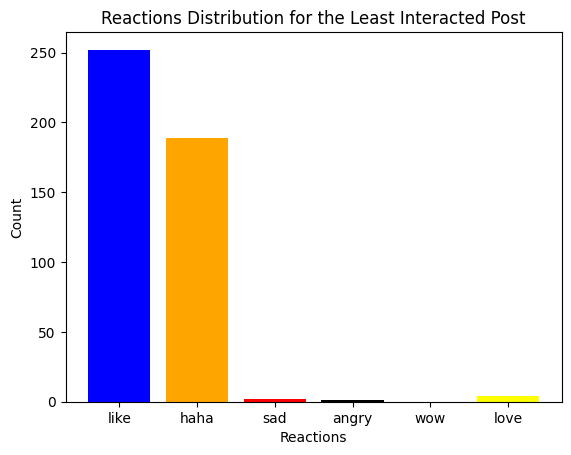

In [64]:
reactions = ['like', 'haha', 'sad','angry','wow', 'love']
counts = [least_interacted_post[reaction] for reaction in reactions]

# Plotting
plt.bar(reactions, counts, color=['blue', 'orange', 'red', 'black', 'green', 'yellow'])
plt.title('Reactions Distribution for the Least Interacted Post')
plt.xlabel('Reactions')
plt.ylabel('Count')
plt.show()

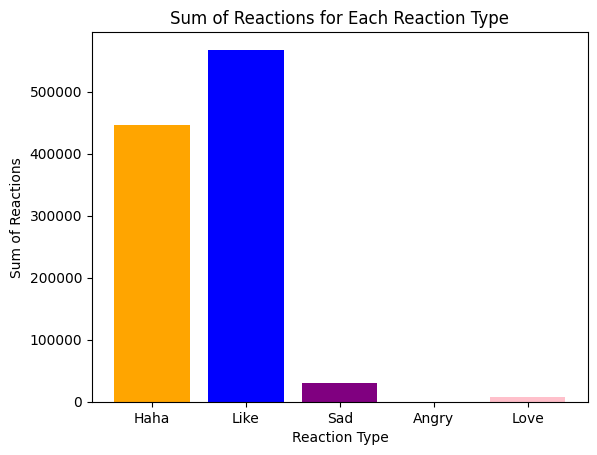

In [65]:
haha = df['haha'].sum()
like = df['like'].sum()
sad = df['sad'].sum()
angry = df['angry'].sum()
love = df['love'].sum()
reaction_types = ['Haha', 'Like', 'Sad', 'Angry', 'Love']
reaction_sums = [haha, like, sad, angry, love]

plt.bar(reaction_types, reaction_sums, color=['orange', 'blue', 'purple', 'red', 'pink'])
plt.title('Sum of Reactions for Each Reaction Type')
plt.xlabel('Reaction Type')
plt.ylabel('Sum of Reactions')
plt.show()

Text(0, 0.5, 'Posts')

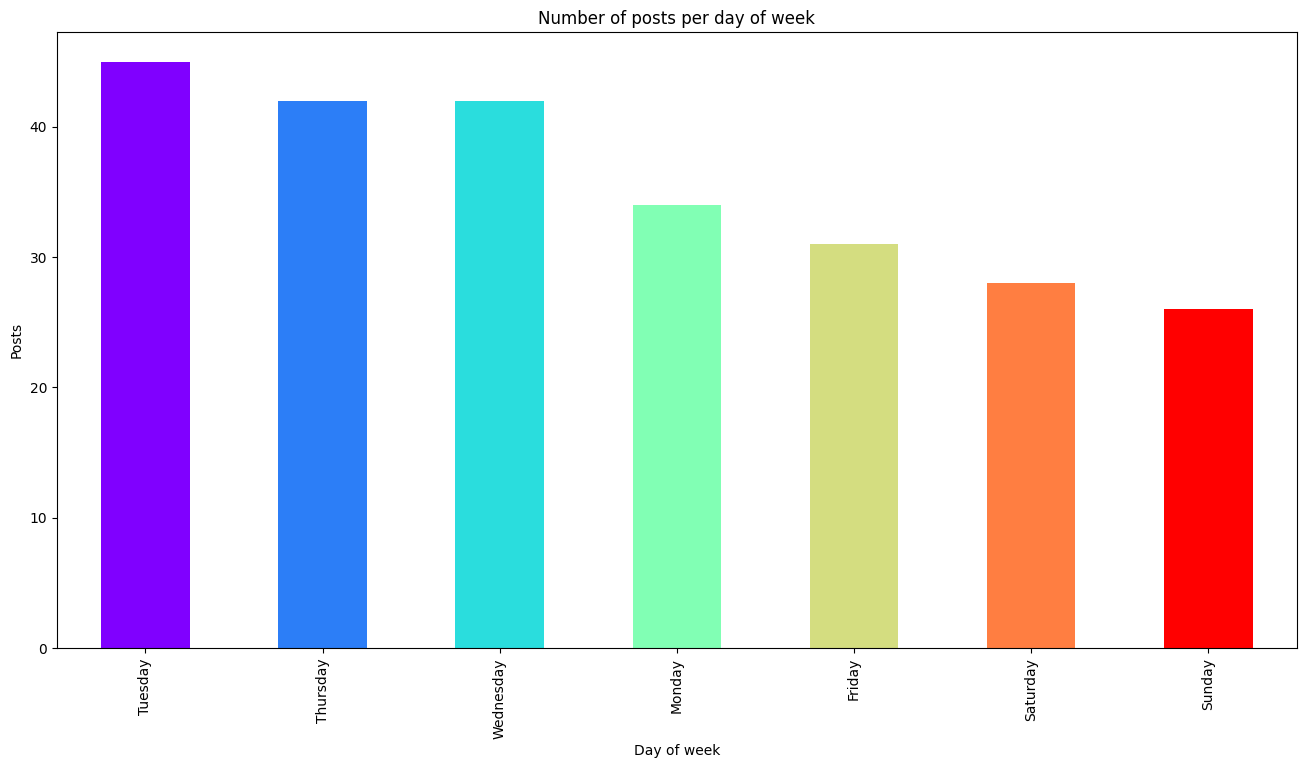

In [66]:
df['created_time'] = pd.to_datetime(df['created_time'])
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['week_day'] = df['created_time'].apply(lambda x: week_day[x.weekday()])

colors = cm.rainbow(np.linspace(0, 1, len(df['week_day'].unique())))
df['week_day'].value_counts().plot(kind='bar', figsize=(16,8), color=colors)
plt.title('Number of posts per day of week')
plt.xlabel('Day of week')
plt.ylabel('Posts')

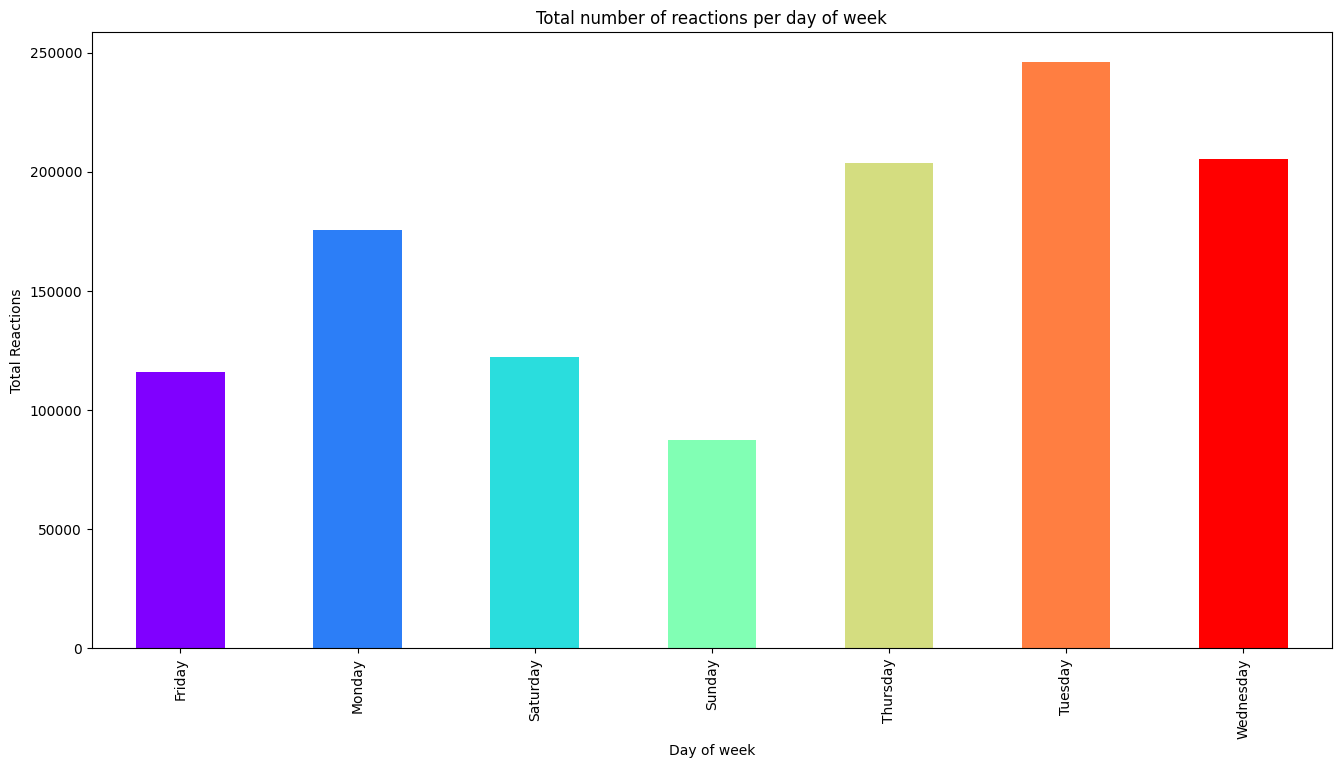

In [70]:
grouped_data = df.groupby('week_day')['tuong_tac'].sum()

# Plotting
colors = cm.rainbow(np.linspace(0, 1, len(grouped_data)))
grouped_data.plot(kind='bar', color=colors, figsize=(16, 8))
plt.title('Total number of reactions per day of week')
plt.xlabel('Day of week')
plt.ylabel('Total Reactions')
plt.show()

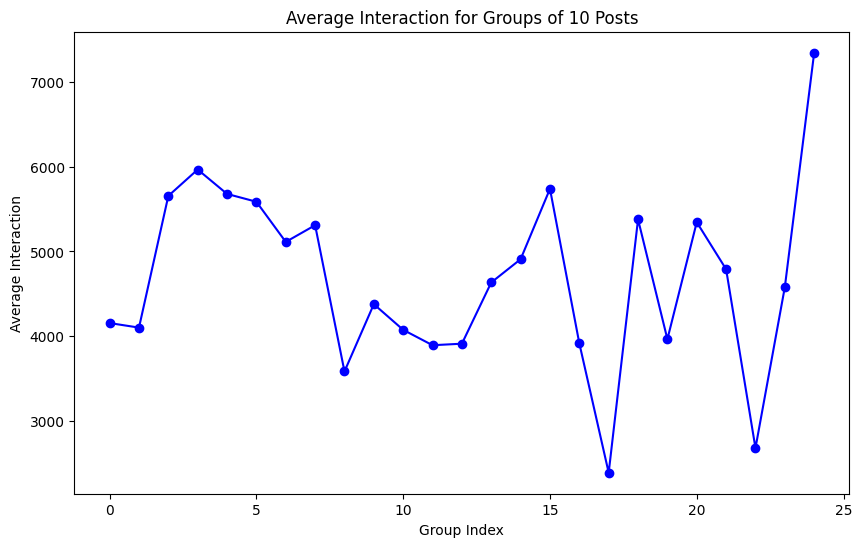

In [75]:
df = df.sort_values(by='created_time')

grouped_data = df.groupby(df.index // 10)['tuong_tac'].mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data, marker='o', linestyle='-', color='b')
plt.title('Average Interaction for Groups of 10 Posts')
plt.xlabel('Group Index')
plt.ylabel('Average Interaction')
plt.show()


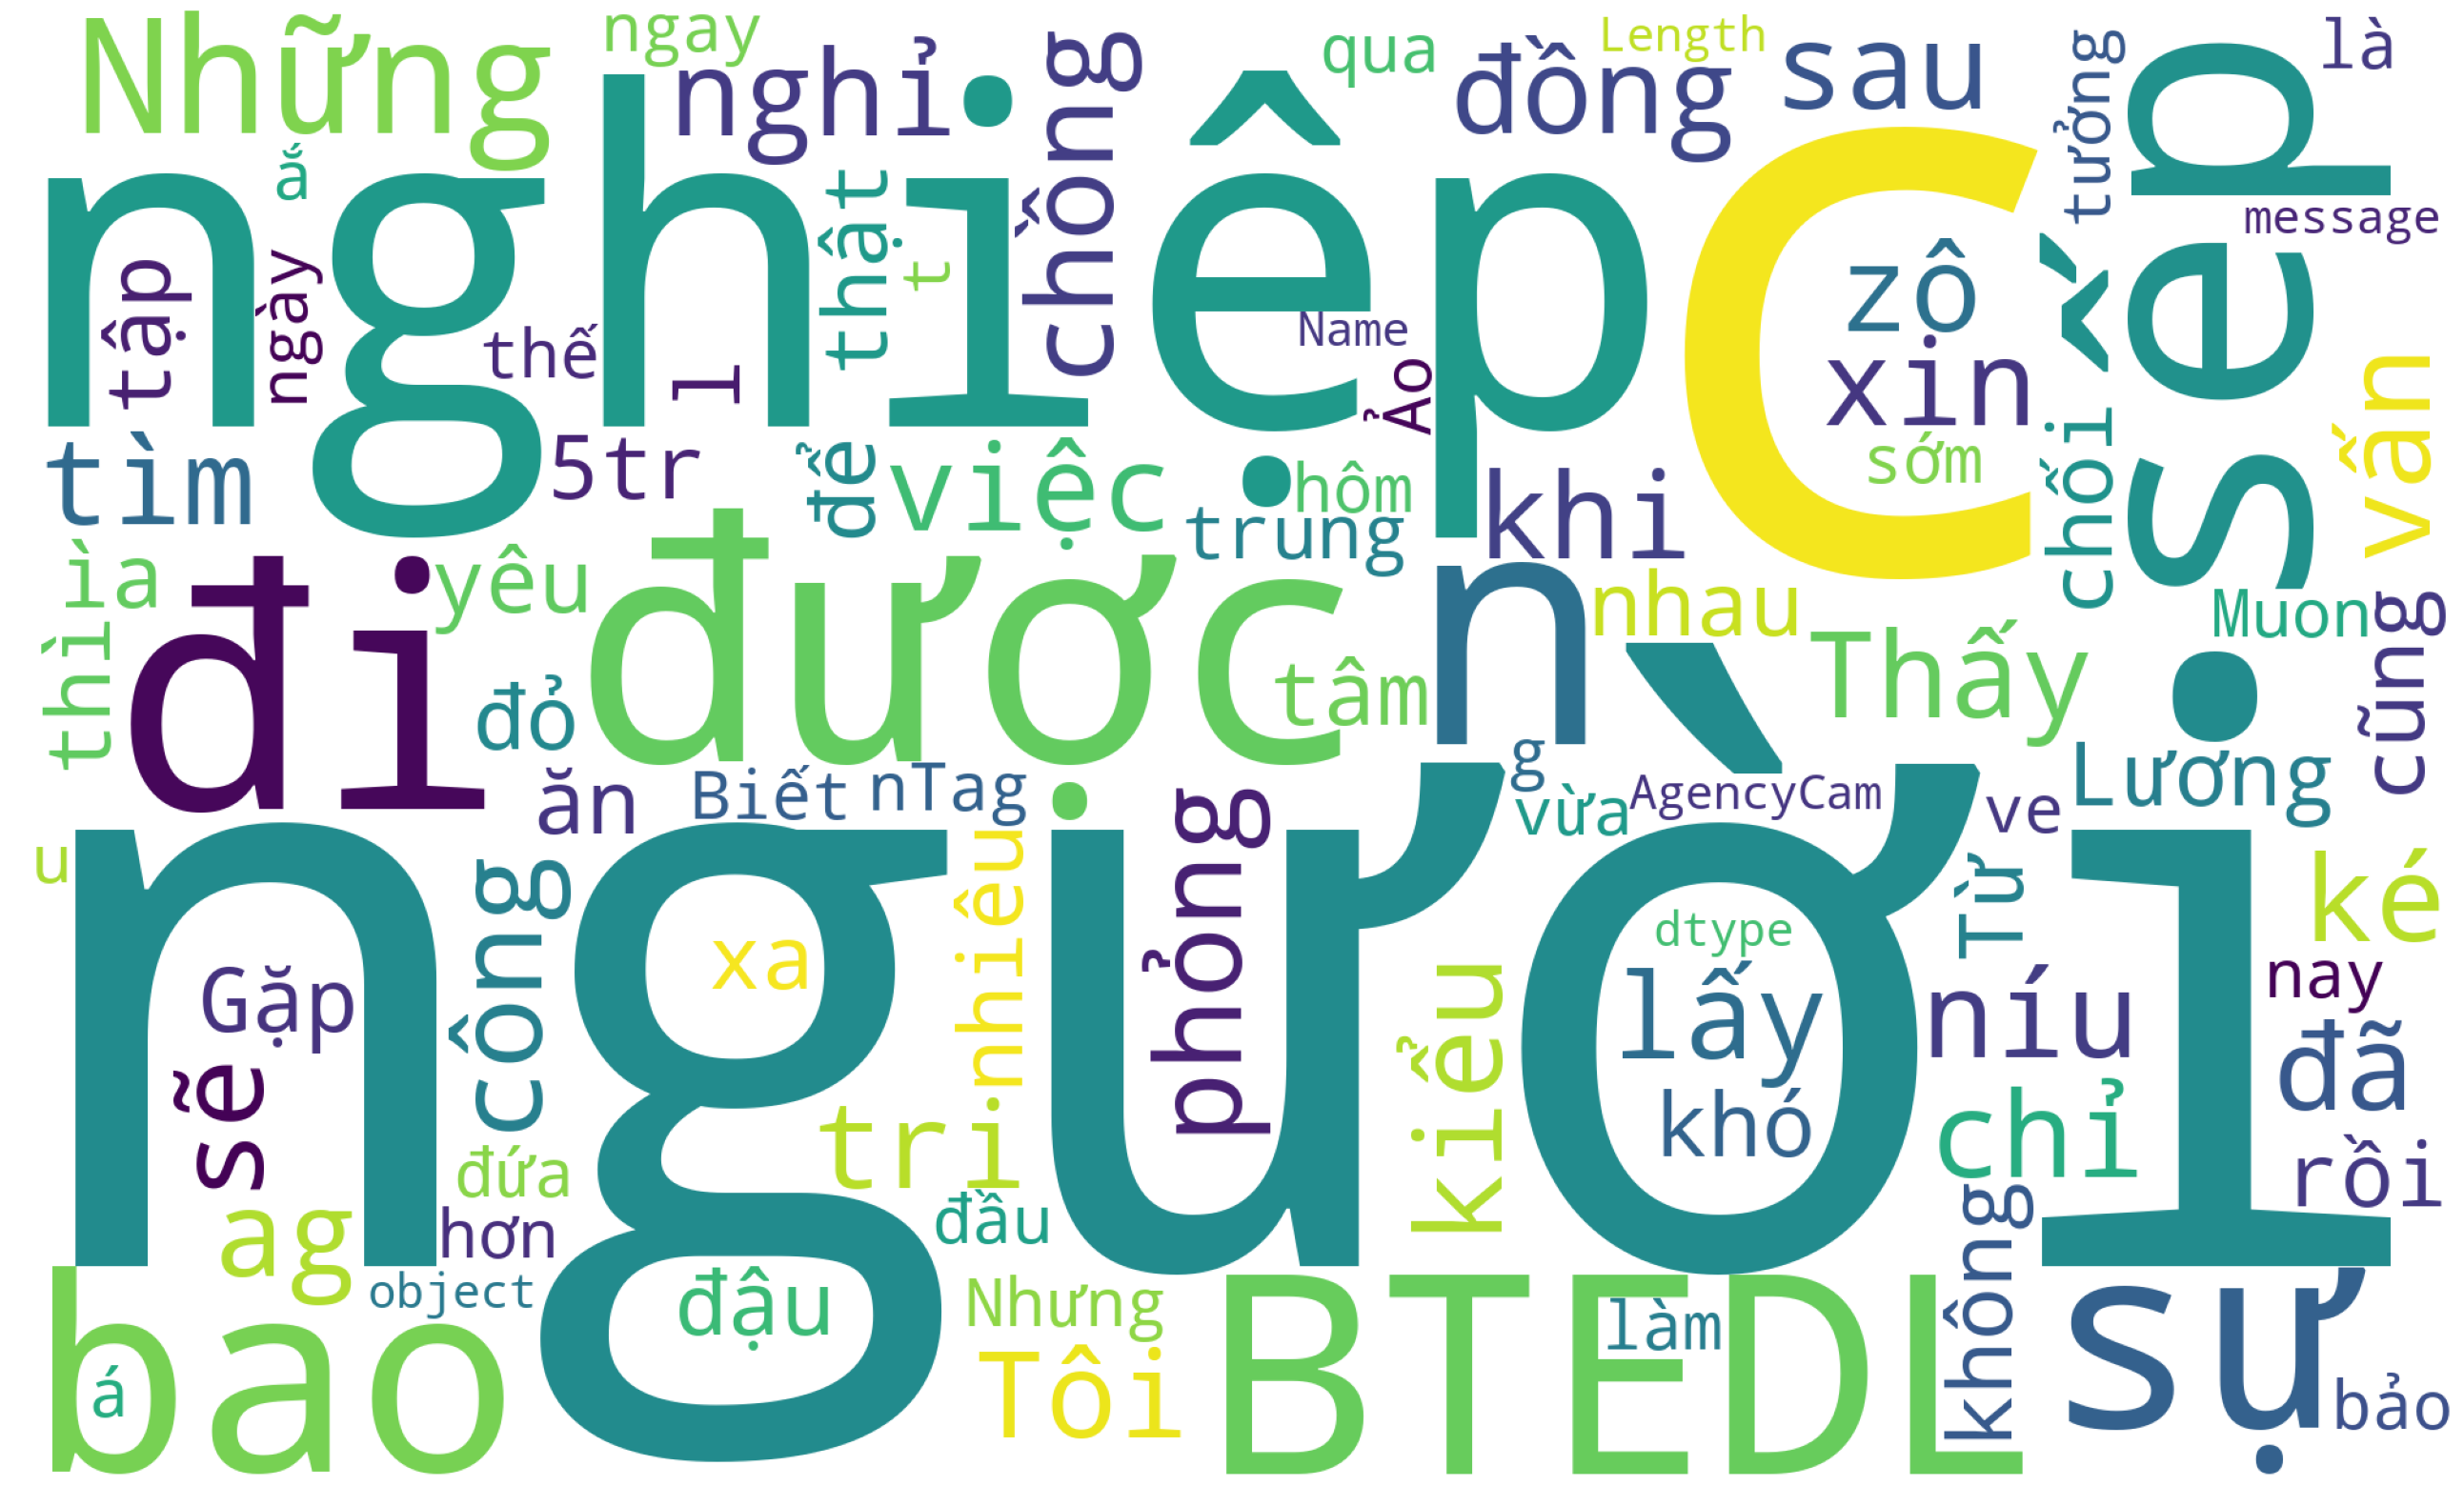

In [76]:
full_post_text = str(df['message'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(full_post_text)

plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

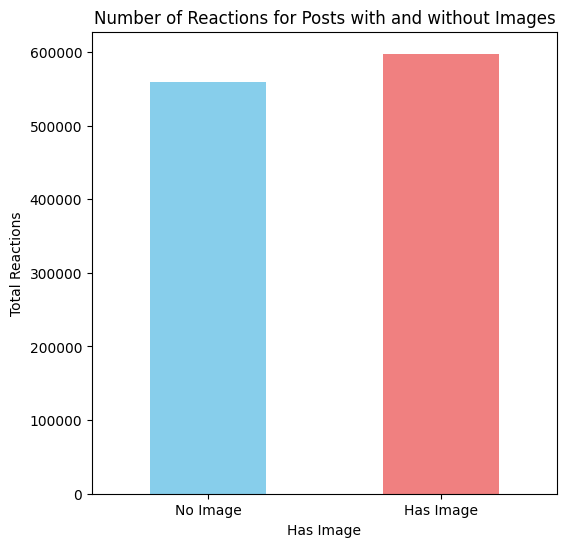

In [173]:
df['has_image'] = df['picture'].apply(lambda x: 1 if pd.notna(x) and x != ' ' else 0)

# Group by 'has_image' and calculate the sum of reactions for each group
grouped_data = df.groupby('has_image')['tuong_tac'].sum()

# Plotting
plt.figure(figsize=(6, 6))
grouped_data.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Number of Reactions for Posts with and without Images')
plt.xlabel('Has Image')
plt.ylabel('Total Reactions')
plt.xticks([0, 1], ['No Image', 'Has Image'], rotation=0)
plt.show()

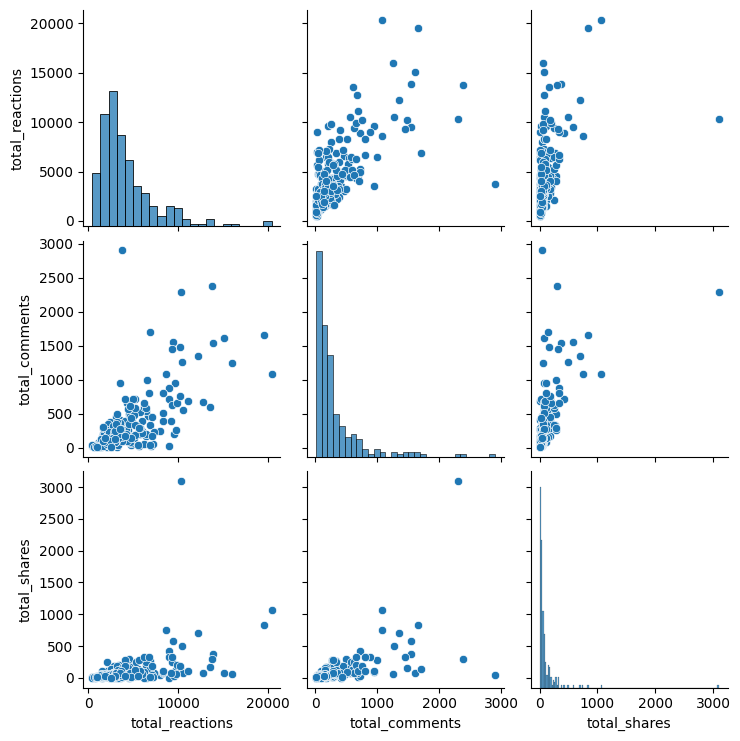

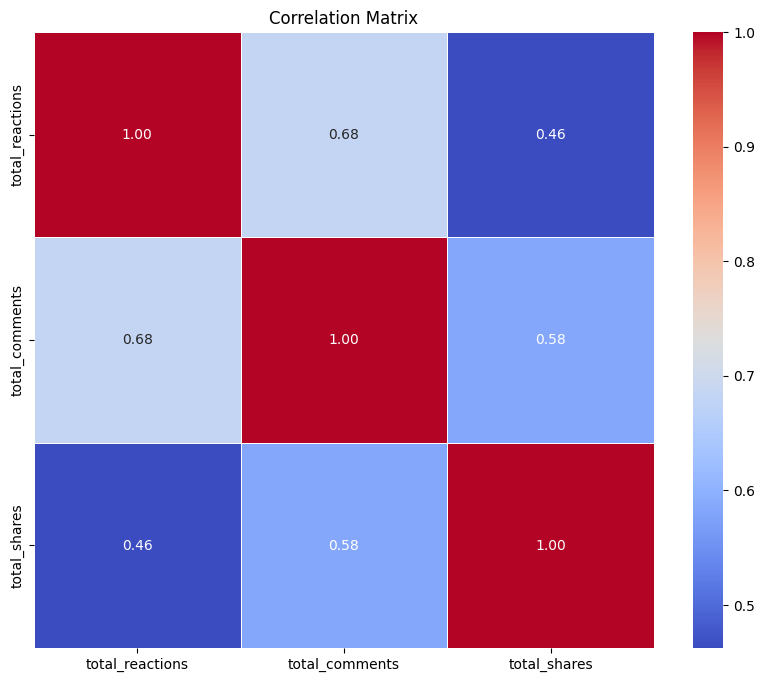

In [91]:
#S·ª± t∆∞∆°ng quan gi·ªØa s·ªë l∆∞·ª£ng reactions v√† s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n v√† share
columns_to_analyze = ['total_reactions', 'total_comments', 'total_shares']

# Subset the DataFrame with the selected columns
subset_df = df[columns_to_analyze]

# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Plot scatter plots for selected columns
sns.pairplot(subset_df)
plt.show()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 247 to 0
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   name             248 non-null    object             
 1   id_post          248 non-null    object             
 2   created_time     248 non-null    datetime64[ns, UTC]
 3   message          248 non-null    object             
 4   type             248 non-null    object             
 5   picture          248 non-null    object             
 6   like             248 non-null    int64              
 7   love             248 non-null    int64              
 8   haha             248 non-null    int64              
 9   wow              248 non-null    int64              
 10  sad              248 non-null    int64              
 11  angry            248 non-null    int64              
 12  comments         248 non-null    object             
 13  total_reactions  248 non-

In [ ]:
#Gi·ªõi t√≠nh c·ªßa ng∆∞·ªùi t∆∞∆°ng t√°c
import json
def parse_json_safe(x):
    try:
        return json.loads(x) if pd.notna(x) else []
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return []

# Apply the parse_json_safe function to the 'comments' column
df['comments'] = df['comments'].apply(parse_json_safe)

# Extract gender information
df['gender'] = df['comments'].apply(lambda comments: [comment.get('from', {}).get('gender', None) for comment in comments])

# Filter out None values
df['gender'] = df['gender'].apply(lambda genders: [gender for gender in genders if gender is not None])

# Explode the list of genders to individual rows
gender_counts = df['gender'].explode().value_counts()

# Plotting
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Gender Distribution of Commenters')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [253]:

all_messages = [comment.get('message', None) for comments in df['comments'] for comment in comments]
all_messages
# Display all messages



['Nguy·ªÖn Thu Hi·ªÅn',
 'Ng√¥ Ng·ªçc Qu·ª≥nhüòÄ',
 'Thanh Thu·ª≥ Nguy·ªÖn h√¢hhaaa',
 ':))',
 'Nh√¢n vi√™n t·∫°p v·ª• belike :)))',
 'Th·ª© 2 t ƒëi th·ª≠ vi·ªác. Xem vid xong t·ª± nhi√™n c∆°n lo l·∫Øng, h·ªìi h·ªôp n√≥ ·∫≠p ƒë·∫øn. Kh·ªï c√°i th√¢n t√¥i',
 'Nhu·ªôm t√≥c xong xinh g√°i h·∫≥n',
 'Thanh Xu√¢n gi·ªëng k',
 'Chi·∫øu m·ªõi :)))',
 'Mei Meii Nguy·ªÖn Th∆∞ :)))',
 'K c√≤n g√¨ ƒë·ªÉ n√≥i, v·∫´n nh∆∞ t√™n page=))',
 'ch·ªã Trang rapper ƒë√¢u nh·ªÉ',
 'V·ªõi h∆°n 6,5 t·ª∑ l·ª£i khu·∫©n ùòì. ùò±ùò¢ùò≥ùò¢ùò§ùò¢ùò¥ùò¶ùò™ Shirota trong m·ªói chai Yakult, gi√∫p c√¢n b·∫±ng h·ªá vi sinh, ngƒÉn ng·ª´a c√°c b·ªánh li√™n quan ƒë·∫øn ƒë∆∞·ªùng ru·ªôt v√† h·ªó tr·ª£ tƒÉng c∆∞·ªùng mi·ªÖn d·ªãch. C·ª© y√™n t√¢m m√† u·ªëng ·ª±c ·ª±c m·ªói ng√†y ƒë·ªÉ n√¢ng cao s·ª©c kh·ªèe nh√© c√°c t√¨nh y√™u üòò',
 'C·ª© nh∆∞ th·∫•y c·∫£ c√¥ng ty trong c√°i clip n√†y =)) https://www.facebook.com/watch/289134847766221/839557291094136/',
 '·∫∫ m∆∞·ª£t m·ªõi c·ªëng hi·∫øn t·ªët dc',
 'yakult n√® ƒ

Note: you may need to restart the kernel to use updated packages.
Message: Nguy·ªÖn Thu Hi·ªÅn, Sentiment: Neutral
Message: Ng√¥ Ng·ªçc Qu·ª≥nhüòÄ, Sentiment: Positive
Message: Thanh Thu·ª≥ Nguy·ªÖn h√¢hhaaa, Sentiment: Neutral
Message: :)), Sentiment: Neutral
Message: Nh√¢n vi√™n t·∫°p v·ª• belike :))), Sentiment: Neutral
Message: Th·ª© 2 t ƒëi th·ª≠ vi·ªác. Xem vid xong t·ª± nhi√™n c∆°n lo l·∫Øng, h·ªìi h·ªôp n√≥ ·∫≠p ƒë·∫øn. Kh·ªï c√°i th√¢n t√¥i, Sentiment: Neutral
Message: Nhu·ªôm t√≥c xong xinh g√°i h·∫≥n, Sentiment: Neutral
Message: Thanh Xu√¢n gi·ªëng k, Sentiment: Neutral
Message: Chi·∫øu m·ªõi :))), Sentiment: Neutral
Message: Mei Meii Nguy·ªÖn Th∆∞ :))), Sentiment: Neutral
Message: K c√≤n g√¨ ƒë·ªÉ n√≥i, v·∫´n nh∆∞ t√™n page=)), Sentiment: Neutral
Message: ch·ªã Trang rapper ƒë√¢u nh·ªÉ, Sentiment: Neutral
Message: V·ªõi h∆°n 6,5 t·ª∑ l·ª£i khu·∫©n ùòì. ùò±ùò¢ùò≥ùò¢ùò§ùò¢ùò¥ùò¶ùò™ Shirota trong m·ªói chai Yakult, gi√∫p c√¢n b·∫±ng h·ªá vi sinh, ngƒÉn ng·ª´a c√°c b

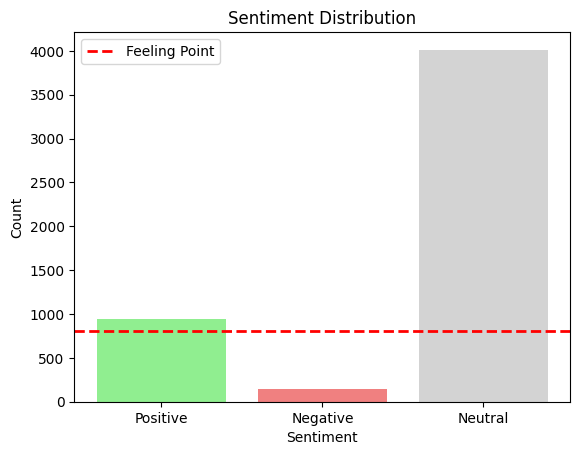

In [272]:
%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Predict sentiment for each message
sentiments = [analyzer.polarity_scores(message)['compound'] for message in all_messages]

# Classify sentiments as positive, negative, or neutral
classified_sentiments = ['Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral' for score in sentiments]

# Display the results
negative = 0
positive = 0
neutral = 0
for message, sentiment in zip(all_messages, classified_sentiments):
    if sentiment == 'Negative':
        negative+=1
    if sentiment == 'Positive':
        positive+=1
    if sentiment == 'Neutral':
        neutral+=1
    print(f"Message: {message}, Sentiment: {sentiment}")

labels = ['Positive', 'Negative', 'Neutral']
counts = [positive, negative, neutral]
feeling_point = positive - negative
plt.bar(labels, counts, color=['lightgreen', 'lightcoral', 'lightgrey'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.axhline(feeling_point, color='red', linestyle='dashed', linewidth=2, label='Feeling Point')

plt.legend()
plt.show()